In [10]:
%%time
%load_ext autoreload

from analysis_utils import *
from joblib import Parallel, delayed
import multiprocessing  
import numpy as np
import pandas as pd

#Growth rate = 3.0
#Computes the translation latencies from our model with simulations containing
#1 to 14 cognate ternary complexes in the voxel (14 to 42 not included because
#the probability of voxels with that number of cognates is ~0)
path = "/Users/Akshay/Documents/tRNAShuffle/data/"
ensmbl_latency_dict = dict()
rxndiff=dict()
scalingFactor = 200
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}


data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data,100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 50.6 s, sys: 509 ms, total: 51.1 s
Wall time: 51.7 s


248.8771055616273


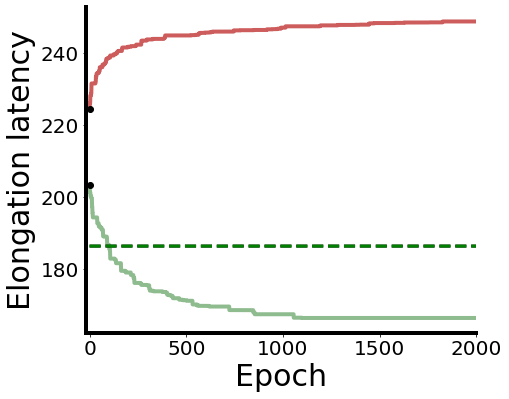

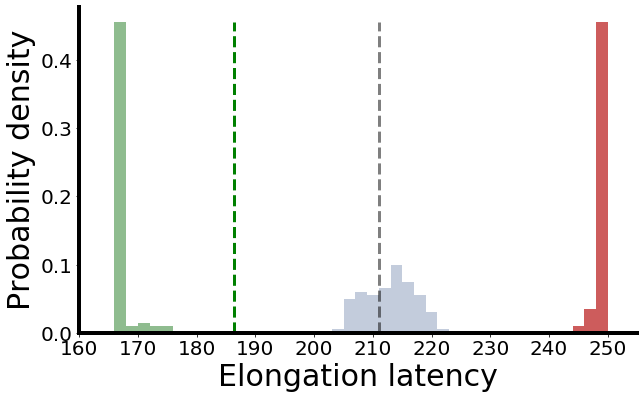

In [19]:
import matplotlib.pyplot as plt
import numpy as np

####Plot GA trajectory for both fast and slow
fullelongt = np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_fullelongt.npy')
fig,ax = plt.subplots(figsize=(7,6))
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='darkseagreen')
ax.plot(np.arange(len(fullelongt)),[186.4]*len(fullelongt),linewidth=3,color='black',linestyle='dashed')
ax.set_xlim(-20,len(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

fullelongt = np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_slowtRNA_fullelongt.npy')
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='indianred')
ax.plot(np.arange(len(fullelongt)),[186.4]*len(fullelongt),linewidth=3,color='green',linestyle='dashed')
print(max(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_ylabel('Elongation latency',fontsize=30)
ax.set_xlabel('Epoch',fontsize=30)

####Plot final populations for fast and slow
fig,ax = plt.subplots(figsize=(10,6))

elongt_list=np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_elongt.npy')
hist=ax.hist(elongt_list,15,range=(164,194),color='darkseagreen',density=True)

elongt_list=np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_slowtRNA_elongt.npy')
hist=ax.hist(elongt_list,15,range=(240,270),color='indianred',density=True)

ax.plot([211]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5,linestyle='dashed')
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green',linestyle='dashed')

elongt_list = np.load('./data/UniformRandomtRNA_WTCodonUsage_100sample_elongt.npy')
hist=ax.hist(elongt_list,15,range = (195,225),color='#39568CFF',density=True,alpha=0.3)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.set_ylabel('Probability density',fontsize=30)
    ax.set_xlabel('Elongation latency',fontsize=30)
    ax.set_xlim(160,255)
    ax.set_xticks(np.arange(160,260,10))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

####Plot GA trajectory for both fast and slow
fullelongt = np.load('./data/WTtRNA_UniformRandomCodonUsage_2ksample_fastCodonUsage_fullelongt.npy')
fig,ax = plt.subplots(figsize=(7,6))
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='darkseagreen')
ax.plot(np.arange(len(fullelongt)),[186.4]*len(fullelongt),linewidth=3,color='black',linestyle='dashed')
ax.set_xlim(-20,len(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

fullelongt = np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_slowtCodonUsage_fullelongt.npy')
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='indianred')
ax.plot(np.arange(len(fullelongt)),[186.4]*len(fullelongt),linewidth=3,color='green',linestyle='dashed')
print(max(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_ylabel('Elongation latency',fontsize=30)
ax.set_xlabel('Epoch',fontsize=30)

####Plot final populations for fast and slow
fig,ax = plt.subplots(figsize=(10,6))

elongt_list=np.load('./data/WTtRNA_UniformRandomCodonUsage_2ksample_fastCodonUsage_elongt.npy')
hist=ax.hist(elongt_list,15,range=(164,194),color='darkseagreen',density=True)

elongt_list=np.load('./data/WTtRNA_UniformRandomCodonUsage_2ksample_slowCodonUsage_elongt.npy')
hist=ax.hist(elongt_list,15,range=(240,270),color='indianred',density=True)

ax.plot([211]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5,linestyle='dashed')
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green',linestyle='dashed')

elongt_list = np.load('./data/WTtRNA_UniformRandomCodonUsage_100sample_elongt.npy')
hist=ax.hist(elongt_list,15,range = (195,225),color='#39568CFF',density=True,alpha=0.3)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.set_ylabel('Probability density',fontsize=30)
    ax.set_xlabel('Elongation latency',fontsize=30)
    ax.set_xlim(160,255)
    ax.set_xticks(np.arange(160,260,10))

NameError: name 'gr25_pCodon' is not defined